# Imports

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(plt.style.available)


plt.style.use('mystyle')

#print(plt.rcParams)

#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['figure.facecolor'] = 'w'
#plt.rcParams['grid.linestyle'] = 'dashed'
#plt.rcParams['font.size'] = 20
#plt.rcParams['axes.edgecolor'] = '#afafaf'
#plt.rcParams['grid.color'] = '#afafaf'
#plt.rcParams['axes.facecolor'] = '#fafafa'
#plt.rcParams['axes.facecolor'] = 'w'
#plt.rcParams['figure.facecolor'] = '#fafafa'
#plt.rcParams['figure.facecolor'] = 'w'

['classic', 'bmh', 'mystyle', 'seaborn-white', 'seaborn-pastel', 'fivethirtyeight', 'seaborn-talk', 'seaborn-ticks', 'seaborn-poster', 'seaborn-darkgrid', 'grayscale', 'seaborn-dark', 'seaborn-muted', 'seaborn-dark-palette', 'seaborn-paper', 'seaborn-colorblind', 'seaborn-whitegrid', 'dark_background', 'ggplot', 'seaborn-notebook', 'seaborn-bright', 'seaborn-deep']


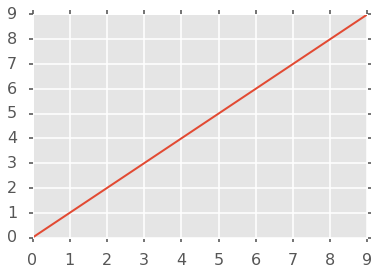

In [37]:
plt.style.use('ggplot')
plt.plot(np.arange(10))

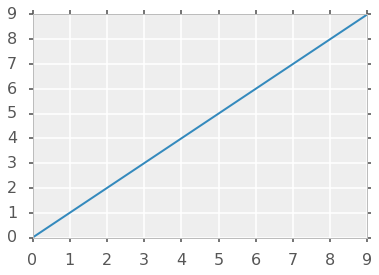

In [38]:
plt.style.use('bmh')
plt.plot(np.arange(10))

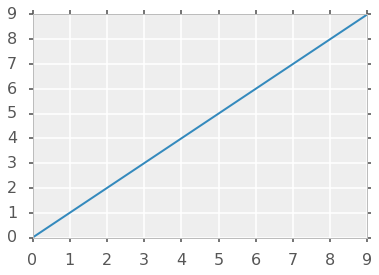

In [39]:
plt.style.use('bmh')
plt.plot(np.arange(10))

In [40]:
import astropy
import astropy.coordinates as coord
import astropy.units as u

import astropy.constants as c
from astropy.table import Table

# Zwicky catalog of galaxies

In [41]:
uzcat = pd.read_table('data/uzcJ2000.tab/uzcJ2000.tab', 
                   sep='\t', 
                   header=16, 
                   dtype='str',
                   names=['ra', 'dec', 'Zmag', 'cz', 'cze', 'T', 'U', 'Ne',
                           'Zname', 'C', 'Ref', 'Oname', 'M', 'N'],
                   skiprows=[17])

In [42]:
uzcat.head()

ra      dec  Zmag     cz  cze  T  U  Ne         Zname  C   Ref  \
0  000237.9  +163838  14.9   6350   19  A  1   0  000000+16220  F         
1  000246.3  +185310  14.8   7864   47  A  0   0  000012+18370  Z  0650   
2  000257.0  +041231  15.5   8695   40  E  0   0  000030+03560  Z  2700   
3  000302.9  +185221  15.5   8007   39  E  0   0  000030+18360  Z  0650   
4  000305.6  -015450  14.3   7298   42  B  0   0  000036-02110  Z  2218   

         Oname  M  N  
0  I5378S             
1  00002+1837         
2  00005+0356         
3  00005+1836         
4  00006-0211

In [43]:
uzcat['ra'] = uzcat['ra'].apply(lambda x: '{0}h{1}m{2}s'.format(x[:2],x[2:4],x[4:]))
uzcat['dec'] = uzcat['dec'].apply(lambda x: '{0}d{1}m{2}s'.format(x[:3],x[3:5],x[5:]))

In [44]:
coords_uzc = coord.SkyCoord(uzcat['ra'], uzcat['dec'], frame='fk5', equinox='J2000')

In [45]:
coords_uzc.ra.deg.min()

0.0070833333333333321

In [46]:
uzcat = uzcat.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
uzcat['cz'] = uzcat['cz'].astype('float')

In [47]:
color_czs = (uzcat['cz']+abs(uzcat['cz'].min())) / (uzcat['cz'].max()+abs(uzcat['cz'].min()))

** Where to find the various projections **

In [93]:
import matplotlib
matplotlib.projections.projection_registry.get_projection_names()

['aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear']

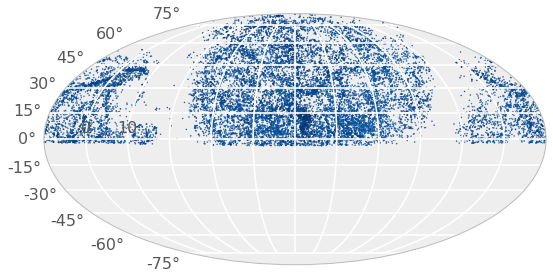

In [109]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coords_uzc.ra.radian-np.pi, coords_uzc.dec.radian, 
           color=plt.cm.Blues_r(color_czs), alpha=0.7,
           s=4, marker='.', zorder=-1);


In [49]:
uzc_czs = uzcat['cz'].as_matrix()
uzcat['Zmag'] = uzcat['Zmag'].astype('float')
decmin = 15
decmax = 30
ramin = 90
ramax = 295
czmin = 0
czmax = 12500
selection_dec = (coords_uzc.dec.deg>decmin) * (coords_uzc.dec.deg<decmax)
selection_ra = (coords_uzc.ra.deg>ramin) * (coords_uzc.ra.deg<ramax)
selection_czs = (uzc_czs>czmin) * (uzc_czs<czmax)
selection= selection_dec * selection_ra * selection_czs

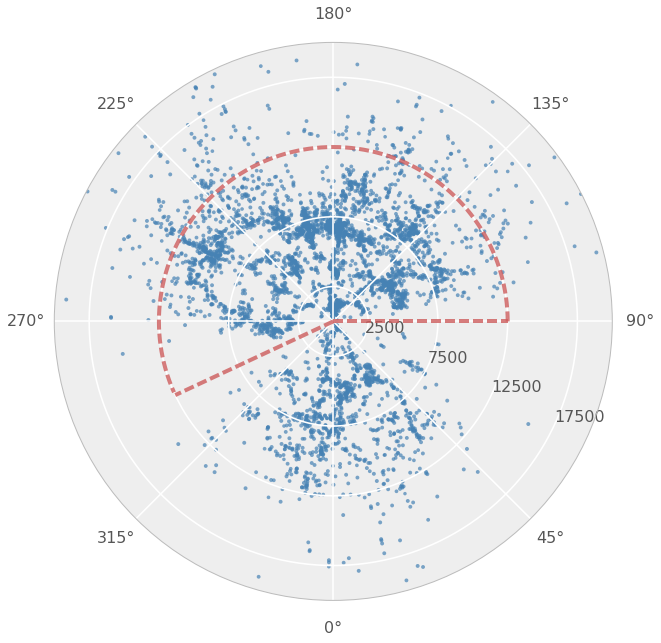

In [50]:
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
sct = ax.scatter(coords_uzc.ra.radian[selection_dec], uzc_czs[selection_dec], 
                     color='SteelBlue',
                     #color=plt.cm.RdBu((coords_uzc.dec.deg[selection])/100.), 
                     s=uzcat['Zmag'][selection_dec*selection_czs], 
                     edgecolors="none", 
                     alpha=0.7,
                    zorder=0)
ax.set_rlim(0,20000)
ax.set_theta_offset(np.pi/-2)
ax.set_rlabel_position(65)
ax.set_rticks(range(2500,20001,5000));
ax.plot([(ramin*u.deg).to(u.radian).value, (ramin*u.deg).to(u.radian).value], [0,12500], 
        color='IndianRed', alpha=0.8, dashes=(10,4), lw=4)
ax.plot([ramax*np.pi/180., ramax*np.pi/180.], [0,12500],
        color='IndianRed', alpha=0.8, dashes=(10,4), lw=4)
theta = np.arange(ramin, ramax, 1)
ax.plot(theta*np.pi/180., np.ones_like(theta)*12500,
        color='IndianRed', alpha=0.8, dashes=(10,4), lw=4);

In [51]:
mycat = uzcat.copy(deep=True).loc[selection]
mycat['ra_deg'] = coords_uzc.ra.deg[selection]
mycat['dec_deg'] = coords_uzc.dec.deg[selection]

In [52]:
mycat.Zmag = mycat.Zmag.astype('float')
mycat.Zmag.head()


3201    15.4
3221    15.5
3231    15.4
3249    15.4
3254    15.3
Name: Zmag, dtype: float64

In [53]:
zs = (((mycat['cz'].as_matrix()*u.km/u.s) / c.c).decompose())
dist = coord.Distance(z=zs)
print(dist)
mycat['dist'] = dist

[  62.79998101  172.23410971  145.40065934 ...,   64.30473839   61.81198342
   57.46582197] Mpc


In [54]:
coords_xyz = coord.SkyCoord(ra=mycat['ra_deg']*u.deg, dec=mycat['dec_deg']*u.deg, distance=dist*u.Mpc, frame='fk5', equinox='J2000')

In [55]:
mycat['X'] = coords_xyz.cartesian.x.value
mycat['Y'] = coords_xyz.cartesian.y.value
mycat['Z'] = coords_xyz.cartesian.z.value

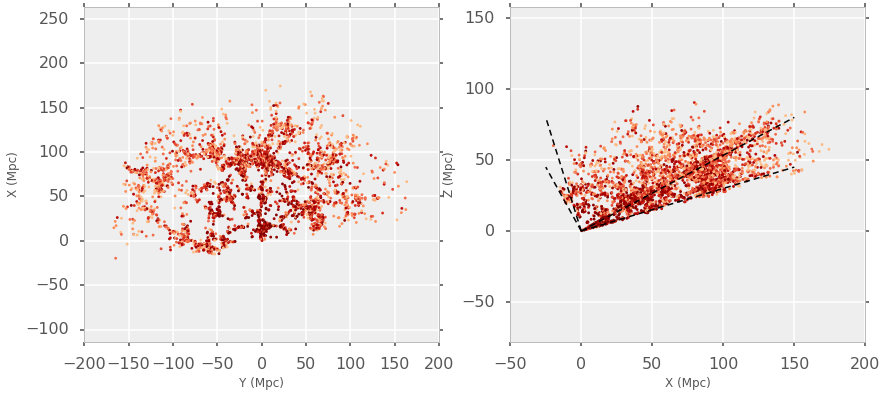

In [56]:
fig,ax = plt.subplots(1,2, figsize=(14,6))

plt.subplot(121)
plt.scatter(mycat['Y'], -1*mycat['X'], s=8, color=plt.cm.OrRd_r(10**(mycat.Zmag-mycat.Zmag.max()) ), edgecolor='None')
plt.xlabel('Y (Mpc)'); plt.ylabel('X (Mpc)')
plt.axis('equal');

#plt.figure(figsize=(7,6))
plt.subplot(122)
plt.scatter(-1*mycat['X'],mycat['Z'], s=8, color=plt.cm.OrRd_r(10**(mycat.Zmag-mycat.Zmag.max()) ), edgecolor='None')
lstyle = dict(lw=1.5, color='k', dashes=(6,4))
plt.plot([0,150], [0,80], **lstyle)
plt.plot([0,150], [0,45], **lstyle)
plt.plot([0,-25], [0,80], **lstyle)
plt.plot([0,-25], [0,45], **lstyle)
plt.xlabel('X (Mpc)'); plt.ylabel('Z (Mpc)')
plt.axis('equal');

In [57]:
mycat.describe()

Zmag            cz       ra_deg      dec_deg         dist  \
count  3259.000000   3259.000000  3259.000000  3259.000000  3259.000000   
mean     14.953974   6812.333538   186.203655    22.481214   100.299020   
std       0.697509   2781.791768    46.249371     4.362414    41.474895   
min       8.900000     31.000000    97.127917    15.000833     0.447238   
25%      14.800000   4792.500000   149.190208    18.505417    69.998827   
50%      15.200000   6886.000000   182.644583    22.324444   101.113686   
75%      15.400000   8881.000000   220.861667    26.526667   131.065547   
max      15.700000  12482.000000   286.765417    29.999722   185.865992   

                 X            Y            Z  
count  3259.000000  3259.000000  3259.000000  
mean    -64.799021    -9.490795    38.344264  
std      37.896815    65.403842    17.557857  
min    -174.322147  -166.518595     0.177526  
25%     -93.320989   -53.625803    26.077586  
50%     -68.627203    -1.816361    38.189294  
75%     -34.137557    36.506820    50.170942  
max      19.650275   163.471919    90.443146

Can we plot something like this??

<img src="http://i.huffpost.com/gen/2023548/thumbs/o-LANIAKEA-MAP-900.jpg?1">

# Map of the Milky Way

http://bessel.vlbi-astrometry.org/parallax


#### Format of input file
|name | l |	b | Prlx | err | $\mu_\alpha$ cos ($\delta$) |err| $\mu_\delta$ | err | v_LSR | err  | Freq | Telescope | Ref | 
|--|--|	-- | -- | -- | -- | -- | -- | --| --| --| -- | -- | 
| [str] | [deg] | [deg] | [mas] | +/- | [mas/yr] | +/- | [mas/yr] | +/- | [km/s] | +/- | [GHz] | [str] | [str] | 
| G105.41+09.87 | 105.41 | 9.87 | 1.129 | 0.063 | -0.21 | 2.38 | -5.49 | 2.38 | -10.0 | 5.0 | 22.2 | VLBA | 2013ApJ...769...15X |

### Read the data

In [58]:
uzcat = pd.read_table('data/bessel.tab',  
                   delim_whitespace=True,
                   names=['name', 'l', 'b', 'prlx', 'prlxerr', 'mua', 'muaerr', 
                          'mud', 'muderr', 'vlsr', 'vlsrerr', 'freq', 'telescope', 'ref'],
                     )

In [59]:
uzcat.head()

name      l     b   prlx  prlxerr   mua  muaerr   mud  muderr  \
0        Sgr-B2M   0.67 -0.04  0.130    0.012 -1.23    0.04 -3.84    0.11   
1        Sgr-B2N   0.68 -0.03  0.128    0.015 -0.32    0.05 -4.69    0.11   
2  G009.62+00.19   9.62  0.20  0.194    0.023 -0.58    0.05 -2.49    0.27   
3  G010.47+00.02  10.47  0.02  0.117    0.008 -3.86    0.02 -6.40    0.08   
4  G010.62-00.38  10.62 -0.38  0.202    0.019 -0.37    0.08 -0.60    0.06   

   vlsr  vlsrerr  freq telescope                  ref  
0  61.0      5.0  22.2      VLBA  2009ApJ...705.1548R  
1  64.0      5.0  22.2      VLBA  2009ApJ...705.1548R  
2   5.0      3.1  12.2      VLBA  2009ApJ...706..464S  
3  68.9      4.5  22.2      VLBA  2014ApJ...781..108S  
4  -3.0      2.7  22.2      VLBA  2014ApJ...781..108S

### Convert to Astropy Table

In [60]:
uzcat = Table(data=uzcat.as_matrix(),                    
    names=['name', 'l', 'b', 'prlx', 'prlxerr', 'mua', 'muaerr', 
                          'mud', 'muderr', 'vlsr', 'vlsrerr', 'freq', 'telescope', 'ref'],
    dtype=[str, float, float, float, float, float, float, 
                          float, float,float, float, str, str, str],
     )

In [61]:
uzcat

<Table length=73>
     name        l       b      prlx  ... freq telescope         ref        
    str15     float64 float64 float64 ... str7    str4          str19       
------------- ------- ------- ------- ... ---- --------- -------------------
      Sgr-B2M    0.67   -0.04    0.13 ... 22.2      VLBA 2009ApJ...705.1548R
      Sgr-B2N    0.68   -0.03   0.128 ... 22.2      VLBA 2009ApJ...705.1548R
G009.62+00.19    9.62     0.2   0.194 ... 12.2      VLBA 2009ApJ...706..464S
G010.47+00.02   10.47    0.02   0.117 ... 22.2      VLBA 2014ApJ...781..108S
G010.62-00.38   10.62   -0.38   0.202 ... 22.2      VLBA 2014ApJ...781..108S
G011.49−01.48   11.49   -1.48     0.8 ... 12.2      VLBA 2014A&A...566A..17W
G012.02-00.03   12.03   -0.03   0.106 ... 12.2      VLBA 2014ApJ...781..108S
 G012.68-0.18   12.68   -0.18   0.416 ...   22      VLBA 2013A&A...553A.117I
 G012.81-0.19   12.81   -0.19   0.343 ...   22      VLBA 2013A&A...553A.117I
 G012.81-0.19   12.81   -0.19   0.343 ...   22      VLBA 2013A&A...553A.117I
          ...     ...     ...     ... ...  ...       ...                 ...
 G183.72-3.66  183.72   -3.66   0.629 ...   22      VLBA 2014ApJ...790...99C
         S252  188.95    0.89   0.476 ... 12.2      VLBA 2009ApJ...693..397R
         S269  196.45   -1.68   0.189 ... 22.2      VERA 2007PASJ...59..889H
        Orion  209.01   -19.3   2.425 ...  8.4      VLBA 2007A&A...474..515M
 G229.57+0.15  229.57    0.15   0.218 ...   22      VLBA 2014ApJ...790...99C
   G232.6+1.0  232.62     1.0   0.596 ... 12.2      VLBA 2009ApJ...693..397R
 G236.81+1.98  236.81    1.98   0.326 ...   22      VLBA 2014ApJ...790...99C
       VY-CMa  239.35   -5.06    0.83 ...   43      VLBA 2012ApJ...744...23Z
 G240.31+0.07  240.31    0.07   0.188 ...   22      VLBA 2014ApJ...790...99C
      NGC6334  351.44    0.65   0.744 ... 12.2      VLBA 2014A&A...566A..17W

In [62]:
uzcat['l'].unit = u.deg
uzcat['b'].unit = u.deg
uzcat['prlx'].unit = u.mas
uzcat['prlxerr'].unit = u.mas
uzcat['mua'].unit = u.mas/u.year
uzcat['muaerr'].unit = u.mas/u.year
uzcat['mud'].unit = u.mas/u.year
uzcat['muderr'].unit = u.mas/u.year
uzcat['vlsr'].unit = u.km/u.s
uzcat['vlsrerr'].unit = u.km/u.s
uzcat['freq'].unit = u.GHz

In [63]:
uzcat['mud'].unit

Unit("mas / yr")

In [64]:
uzcat['l'][:5]

<Column name='l' dtype='float64' unit='deg' length=5>
 0.67
 0.68
 9.62
10.47
10.62

### Plot the data

In [65]:
distances = 1./uzcat['prlx'].quantity.to(u.arcsec).value * 1e-3

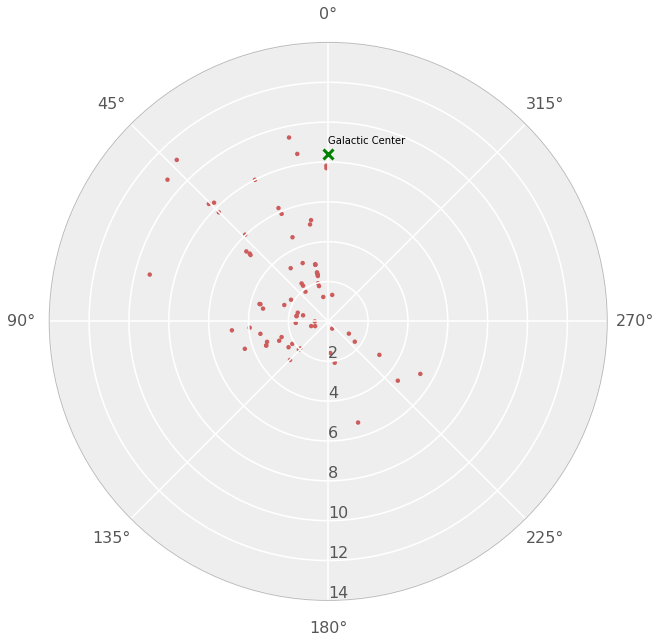

In [66]:
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
sct = ax.scatter(uzcat['l'].quantity.to(u.rad), distances, 
                     color='IndianRed',
                     #color=plt.cm.RdBu((coords_uzc.dec.deg[selection])/100.), 
                     #s=uzcat['Zmag'][selection_dec*selection_czs], 
                     edgecolors="none",
                    zorder=0)
gc = ax.plot(0,8.4, 'x', ms=10, mew=3, c='Green')
ax.text(0,8.9, 'Galactic Center')
ax.set_rlim(0,10)
ax.set_theta_offset(np.pi/2)
ax.set_rlabel_position(180)
ax.set_rticks(range(2,16,2));
#ax.plot([(ramin*u.deg).to(u.radian).value, (ramin*u.deg).to(u.radian).value], [0,12500], 
#        color='IndianRed', alpha=0.8, dashes=(10,4))
#ax.plot([ramax*np.pi/180., ramax*np.pi/180.], [0,12500],
#        color='IndianRed', alpha=0.8, dashes=(10,4))
#theta = np.arange(ramin, ramax, 1)
#ax.plot(theta*np.pi/180., np.ones_like(theta)*12500,
#        color='IndianRed', alpha=0.8, dashes=(10,4));

Try put this image in http://bessel.vlbi-astrometry.org/observations


# Equatorial and Galactic Coordinates

## Popular packages

    -WCSAxes
    http://wcsaxes.readthedocs.org/

    -PyWCSGrid2
    http://leejjoon.github.io/pywcsgrid2/
    
    - APLpy
    https://aplpy.github.io/
    


### PyWCSGrid2


### APLpy




### WCSAxes
Intended as a replacement for both APLpy, PyWCSGrid2

In [67]:
from astropy.wcs import WCS
from wcsaxes import datasets

#hdu = datasets.fetch_l1448_co_hdu()
hdu = datasets.fetch_msx_hdu()

wcs = WCS(hdu.header)
#hdu.writeto('data/l1558_13co.fits')
try:
    hdu.writeto('data/msx.fits')
except:
    pass

In [68]:
from astropy.io import fits

#hdu = fits.open('data/l1558_13co.fits')[0]

hdu = fits.open('data/msx.fits')[0]
wcs = WCS(hdu.header)

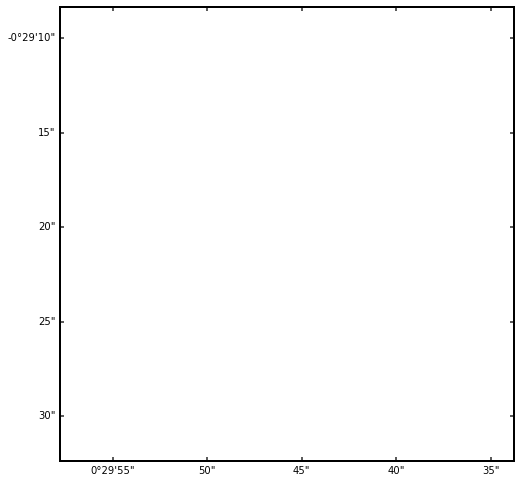

In [69]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection=wcs)

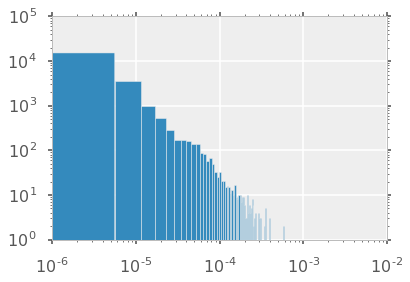

In [70]:
plt.hist(hdu.data.flatten(),bins=500)
plt.yscale('log')
plt.xscale('log')

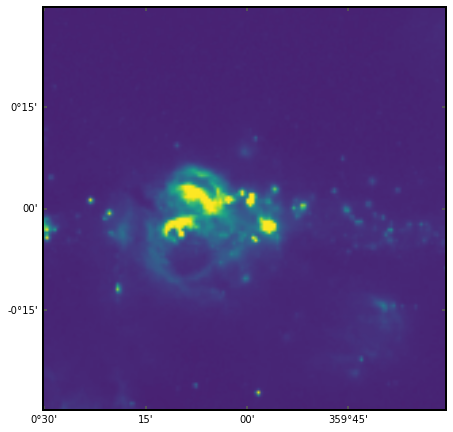

In [73]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=wcs)
ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, cmap=plt.cm.viridis,
          origin='lower')

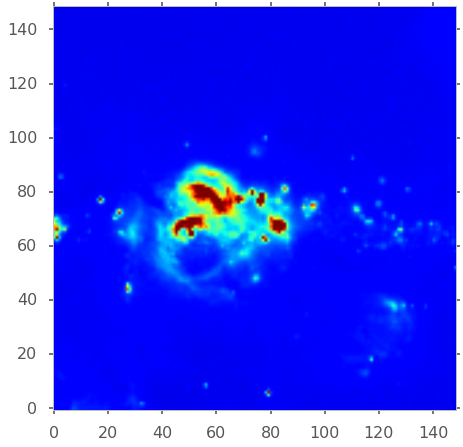

In [76]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0.15, 0.1, 0.8, 0.8])
ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, cmap=plt.cm.jet,
          origin='lower')
plt.grid()

# Other